<a href="https://colab.research.google.com/github/nadic-ifrn/multicore_programming/blob/main/notes/Treinamento_IIII.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

---
# Benefícios do Uso de GPUs  
---

A Unidade de Processamento Gráfico (GPU) fornece muito mais instruções por segundo e largura de banda de memória do que a CPU dentro de uma faixa de preço e consumo de energia similar.

**Diferença de Capacidades entre GPU e CPU** 🧠💡:

- A CPU é projetada para executar uma sequência de operações da forma mais rápida possível e pode executar algumas dezenas dessas threads em paralelo.
- A GPU é projetada para se destacar na execução de milhares delas em paralelo.

<center>
A GPU dedica mais transistores ao processamento de dados
<figure>
    <img src="https://imgur.com/7kCTLne.png" alt="smit" width=500 heigh=100>
        <figcaption>Fonte: https://docs.nvidia.com/cuda/cuda-c-programming-guide </figcaption>
</figure>
</center>

**Combinação: CPUs e GPUs** 🤝🚀:
- A GPU pode ocultar latências de acesso à memória com cálculos, em vez de depender de grandes caches de dados e controle de fluxo complexo.
- Em geral, uma aplicação tem uma mistura de partes paralelas e partes sequenciais, então os sistemas são projetados com uma mistura de GPUs e CPUs para maximizar o desempenho geral. 
- Aplicações com alto grau de paralelismo podem explorar essa natureza massivamente paralela da GPU para alcançar um desempenho superior ao da CPU.

***CUDA: Uma Plataforma e Modelo de Programação Paralela de Propósito Geral***

Em novembro de 2006, a NVIDIA® introduziu o CUDA®, uma plataforma de computação paralela de propósito geral e um modelo de programação que aproveita o motor de computação paralela nas GPUs da NVIDIA.


<center>
O CUDA é projetado para suportar várias linguagens e interfaces de programação de aplicativos.
<figure>
    <img src="https://imgur.com/Q6BMtex.png" alt="smit" width=500 heigh=100>
        <figcaption>Fonte: https://docs.nvidia.com/cuda/cuda-c-programming-guide </figcaption>
</figure>
</center>


---
# Get Started
---

**Passo 1:** Ir para https://colab.research.google.com no navegador  e clicar em Novo Caderno.

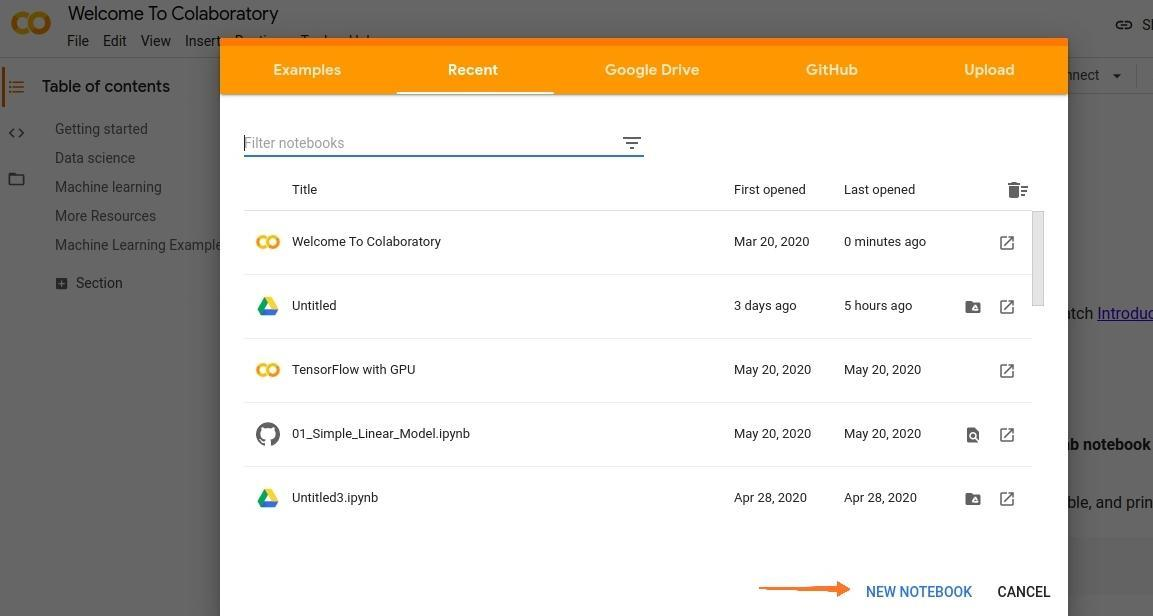

**Passo 2:** Precisamos mudar o tempo de execução da CPU para a GPU. Clique em `Runtime > Alterar tipo de tempo de execução > Acelerador de hardware > GPU > Salvar`.
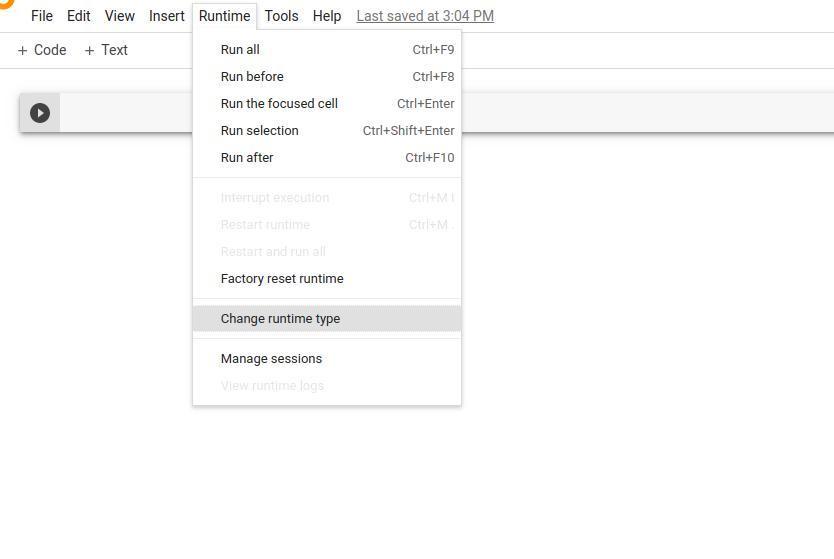

**Passo 3:** Agora você pode verificar se a sua instalação do CUDA está funcionando corretamente executando o comando abaixo:

In [ ]:
!nvcc --version

nvcc: NVIDIA (R) Cuda compiler driver
Copyright (c) 2005-2022 NVIDIA Corporation
Built on Wed_Sep_21_10:33:58_PDT_2022
Cuda compilation tools, release 11.8, V11.8.89
Build cuda_11.8.r11.8/compiler.31833905_0


**Passo 4:** Execute o comando abaixo para instalar uma extensão para executar nvcc nas células do Notebook.

In [ ]:
!pip install git+https://github.com/andreinechaev/nvcc4jupyter.git

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
  Cloning https://github.com/andreinechaev/nvcc4jupyter.git to /tmp/pip-req-build-n19ye5b2
  Running command git clone --filter=blob:none --quiet https://github.com/andreinechaev/nvcc4jupyter.git /tmp/pip-req-build-n19ye5b2
  Resolved https://github.com/andreinechaev/nvcc4jupyter.git to commit aac710a35f52bb78ab34d2e52517237941399eff
  Preparing metadata (setup.py) ... done
  Created wheel for NVCCPlugin: filename=NVCCPlugin-0.0.2-py3-none-any.whl size=4305 sha256=4dfc1db302622b9dbea419fca7265fd33794824fcb87713c7798b91cb1e2cc1c
  Stored in directory: /tmp/pip-ephem-wheel-cache-y8s7f55_/wheels/a8/b9/18/23f8ef71ceb0f63297dd1903aedd067e6243a68ea756d6feea
Successfully built NVCCPlugin


**Passo 5:** Carregue a extensão usando o código fornecido abaixo:

In [ ]:
%load_ext nvcc_plugin

created output directory at /content/src
Out bin /content/result.out


**Passo 6:** Execute o código abaixo para verificar se o CUDA está funcionando corretamente ou não.

 **Nota:** Para executar o código em seu notebook, adicione a extensão `%%cu` no início do seu código.


In [ ]:
%%cu 
#include <iostream>

__global__ void helloCUDA() {
    printf("Hello from CUDA kernel!\n");
}

int main() {
    helloCUDA<<<1, 1>>>();
    cudaDeviceSynchronize();
    std::cout << "Hello from CPU!" << std::endl;
    return 0;
}

UsageError: Cell magic `%%cu` not found.


**Passo 7:** Execute `nvidia-smi` para visualizar o gerenciamento do sistema NVIDIA, assim, exibir informações sobre a GPU NVIDIA, incluindo seu nome, uso de memória e outros detalhes relevantes.


In [ ]:
!nvidia-smi --query-gpu=name,memory.total --format=csv

In [ ]:
!nvidia-smi

Sun Apr 16 19:38:53 2023       
+-----------------------------------------------------------------------------+
| NVIDIA-SMI 525.85.12    Driver Version: 525.85.12    CUDA Version: 12.0     |
|-------------------------------+----------------------+----------------------+
| GPU  Name        Persistence-M| Bus-Id        Disp.A | Volatile Uncorr. ECC |
| Fan  Temp  Perf  Pwr:Usage/Cap|         Memory-Usage | GPU-Util  Compute M. |
|                               |                      |               MIG M. |
|===============================+======================+======================|
|   0  Tesla T4            Off  | 00000000:00:04.0 Off |                    0 |
| N/A   44C    P8    10W /  70W |      0MiB / 15360MiB |      0%      Default |
|                               |                      |                  N/A |
+-------------------------------+----------------------+----------------------+
                                                                               
+-------

---
# 💻🎮 Computação Heterogênea
---



## Terminologia
- <font color="orange">**Host:**</font> A CPU e sua memória (memória do host)
- <font color="orange">**Device:**</font> A GPU e sua memória (memória do dispositivo)


<img src="https://imgur.com/Bp1by83.png" alt="Computaçāo Heterogênea" width="800" height="600" style="background-color:white;">


## Hello World

Vamos rever o código em partes:

<font color="orange">**Colab `nvcc_plugin`**</font>
```cpp
%%cu
```
`%%cu` → Essa linha indica ao Google Colab que o código a seuir é um arquivo CUDA. No ambiente de desenvolvimento normal, você teria que compilar o código usando `nvcc hello.cu -o hello`.

<font color="orange">**Função do kernel CUDA:**</font>

---
```cpp
__global__ void helloCUDA() {
    printf("Hello from CUDA kernel!\n");
}
```

Esta função é um kernel CUDA. A palavra-chave `__global__` indica que a função será executada na GPU (dispositivo). O kernel imprime "Hello from CUDA kernel!" no console.


<font color="orange">**Função principal:**</font>

---
```cpp
int main() {
    helloCUDA<<<1, 1>>>();
    cudaDeviceSynchronize();
    std::cout << "Hello from CPU!" << std::endl;
    return 0;
}
```

A função `main` é o ponto de entrada do programa. Ela faz o seguinte:

1. `helloCUDA<<<1, 1>>>();` → Lança o kernel `helloCUDA` na GPU. A explicaçāo dos parâmetros ficará para logo mais.
2. `cudaDeviceSynchronize();` → Sincroniza a execução da CPU e GPU, garantindo que a GPU termine a execução do kernel antes de continuar.
3. `std::cout << "Hello from CPU!" << std::endl;` → Imprime "Hello from CPU!" no console.

O programa imprime "Hello from CUDA kernel!" a partir da execução do kernel na GPU e, em seguida, "Hello from CPU!" a partir da execução na CPU.

---
# 💻 Fluxo da Programaçāo com CUDA C/C++
---


- 💡 Vamos para um exemplo mais interessante.
- ➡️ Começaremos adicionando dois números inteiros e aumentando para a adição de vetores.

<font color="orange">**Um kernel simples para adicionar dois inteiros**</font>

---
```cpp
__global__ void add(int *a, int *b, int *c) {
    *c = *a + *b;
}
```

📝 Como antes, `__global__` é uma palavra-chave CUDA C/C++ que significa:
- `add()` será executado no `device`.
- `add()` será chamado a partir do `host`.

<font color="orange">**Adição no Device**</font>

---
- Observe que usamos ponteiros para as variáveis:

```cpp
__global__ void add(int *a, int *b, int *c) {
    *c = *a + *b;
}
```

- `add()` é executado no **device**, então `a`, `b` e `c` devem apontar para a memória do **device**.

- **Precisamos alocar memória na GPU. 💾**

<font color="orange">**Fluxo de processamento**</font>

---
A memória do host e do device são entidades separadas:
- 🖥️ Os ponteiros do **device** apontam para a memória da GPU.
  - 🔄 Podem ser passados para/de código do host.
  - 🚫 Não podem ser desreferenciados no código do host.
- 💻 Os ponteiros do **host** apontam para a memória da CPU.
  - 🔄 Podem ser passados para/de código do device.
  - 🚫 Não podem ser desreferenciados no código do device.

API simples do CUDA para lidar com a memória do device:
- `cudaMalloc()`, `cudaFree()`, `cudaMemcpy()`
- 🧩 Semelhantes aos equivalentes em C: `malloc()`, `free()`, `memcpy()`

<font color="orange">**Fluxo Simples de Processamento**</font>

---
<img src="https://imgur.com/XTP3RWY.png" alt="Computaçāo Heterogênea" width="800" height="600" style="background-color:white;">
<img src="https://imgur.com/PJtY1HC.png" alt="Computaçāo Heterogênea" width="800" height="600" style="background-color:white;">
<img src="https://imgur.com/tsgXmtC.png" alt="Computaçāo Heterogênea" width="800" height="600" style="background-color:white;">


- **Segue o código completo:**

In [ ]:
%%cu
#include <iostream>

__global__ void add(int *a, int *b, int *c)
{
    *c = *a + *b;
}

int main(void)
{
    int a, b, c;

    // cópias do host de a, b, c
    int *d_a, *d_b, *d_c;

    // cópias do device de a, b, c
    int size = sizeof(int);

    // Inicializar seed para gerar números aleatórios
    srand(time(NULL));
 
    // Alocar espaço para cópias do device de a, b, c
    cudaMalloc((void **)&d_a, size);
    cudaMalloc((void **)&d_b, size);
    cudaMalloc((void **)&d_c, size);

    // Configurar entrada
    a = 2;
    b = 7;

    // Copiar entradas para o device
    cudaMemcpy(d_a, &a, size, cudaMemcpyHostToDevice);
    cudaMemcpy(d_b, &b, size, cudaMemcpyHostToDevice);

    // Lançar kernel add() na GPU
    add<<<1, 1>>>(d_a, d_b, d_c);

    // Copiar resultado de volta para o host
    cudaMemcpy(&c, d_c, size, cudaMemcpyDeviceToHost);

    std::cout << "Valor final: " << c << std::endl;

    // Limpar
    cudaFree(d_a);
    cudaFree(d_b);
    cudaFree(d_c);

    return 0;
}

Valor final: 9



---
#⬛ Blocos
---
- ✅ A computação GPU é sobre paralelismo massivo!
- ➕ Vamos ver um exemplo de adiçāo de vetores.

In [ ]:
%%cu
#include <iostream>

__global__ void add(int *a, int *b, int *c) {
    c[blockIdx.x] = a[blockIdx.x] + b[blockIdx.x];
}

#define N 512

void random_ints(int *arr, int num) {
    for (int i = 0; i < num; ++i) {
        arr[i] = rand() % 100;
    }
}

void print_array(const char *name, int *arr, int num) {
    std::cout << name << ": ";
    for (int i = 0; i < num; ++i) {
        std::cout << arr[i] << " ";
    }
    std::cout << std::endl;
}

int main(void) {
    int *a, *b, *c;        // cópias do host de a, b, c
    int *d_a, *d_b, *d_c;  // cópias do device de a, b, c
    int size = N * sizeof(int);

    // Alocar espaço para cópias do device de a, b, c
    cudaMalloc((void **)&d_a, size);
    cudaMalloc((void **)&d_b, size);
    cudaMalloc((void **)&d_c, size);

    // Alocar espaço e configurar valores de entrada para cópias do host de a, b, c
    a = (int *)malloc(size);
    random_ints(a, N);
    b = (int *)malloc(size);
    random_ints(b, N);
    c = (int *)malloc(size);

    // Copiar entradas para o device
    cudaMemcpy(d_a, a, size, cudaMemcpyHostToDevice);
    cudaMemcpy(d_b, b, size, cudaMemcpyHostToDevice);

    // Lançar kernel add() na GPU com N blocos
    add<<<N, 1>>>(d_a, d_b, d_c);

    // Copiar resultado de volta para o host
    cudaMemcpy(c, d_c, size, cudaMemcpyDeviceToHost);

    // Exibir os vetores a, b e c no terminal
    print_array("Vetor a", a, N);
    print_array("Vetor b", b, N);
    print_array("Vetor c (resultado)", c, N);

    // Limpar
    free(a);
    free(b);
    free(c);
    cudaFree(d_a);
    cudaFree(d_b);
    cudaFree(d_c);

    return 0;
}


Vetor a: 83 86 77 15 93 35 86 92 49 21 62 27 90 59 63 26 40 26 72 36 11 68 67 29 82 30 62 23 67 35 29 2 22 58 69 67 93 56 11 42 29 73 21 19 84 37 98 24 15 70 13 26 91 80 56 73 62 70 96 81 5 25 84 27 36 5 46 29 13 57 24 95 82 45 14 67 34 64 43 50 87 8 76 78 88 84 3 51 54 99 32 60 76 68 39 12 26 86 94 39 95 70 34 78 67 1 97 2 17 92 52 56 1 80 86 41 65 89 44 19 40 29 31 17 97 71 81 75 9 27 67 56 97 53 86 65 6 83 19 24 28 71 32 29 3 19 70 68 8 15 40 49 96 23 18 45 46 51 21 55 79 88 64 28 41 50 93 0 34 64 24 14 87 56 43 91 27 65 59 36 32 51 37 28 75 7 74 21 58 95 29 37 35 93 18 28 43 11 28 29 76 4 43 63 13 38 6 40 4 18 28 88 69 17 17 96 24 43 70 83 90 99 72 25 44 90 5 39 54 86 69 82 42 64 97 7 55 4 48 11 22 28 99 43 46 68 40 22 11 10 5 1 61 30 78 5 20 36 44 26 22 65 8 16 82 58 24 37 62 24 0 36 52 99 79 50 68 71 73 31 81 30 33 94 60 63 99 81 99 96 59 73 13 68 90 95 26 66 84 40 90 84 76 42 36 7 45 56 79 18 87 12 48 72 59 9 36 10 42 87 6 1 13 72 21 55 19 99 21 4 39 11 40 67 5 28 27 50 84 58 20

<font color="orange">**Vamos quebrar o código**</font>

---
**📖 Terminologia**


Ao trabalhar com CUDA, é importante entender a terminologia usada:

- Cada invocação paralela da função `add()` é chamada de **bloco**.
- O conjunto de blocos é chamado de **grid**.
- Cada invocação pode se referir ao seu índice de bloco usando `blockIdx.x`.

**🔀 Usando `blockIdx.x`**

- No kernel `add`, a variável `blockIdx.x` é usada para indexar os vetores:

```cpp
__global__ void add(int *a, int *b, int *c) {
    c[blockIdx.x] = a[blockIdx.x] + b[blockIdx.x];
}
```

- Ao usar `blockIdx.x` para indexar os vetores, cada bloco lida com um índice diferente. No device, cada bloco pode ser executado em paralelo, permitindo que a adição dos elementos dos vetores `a` e `b` seja feita de forma eficiente e rápida.

**🚀 Lançando o kernel**

- O kernel `add` é lançado na GPU com a seguinte linha de código:

```cpp
add<<<N, 1>>>(d_a, d_b, d_c);
```

- Aqui, `N` representa o número de blocos e `1` representa o número de threads por bloco. No nosso caso, cada bloco possui apenas uma thread. O kernel será lançado com `N` blocos, ou seja, `N` threads no total.

**📦 Gerenciamento de Memória**

Existem duas etapas principais no gerenciamento de memória neste código:

1. **Alocar espaço na memória do host e do device**: O espaço na memória do host é alocado usando a função `malloc`, enquanto o espaço na memória do device é alocado usando a função `cudaMalloc`.

```cpp
cudaMalloc((void **)&d_a, size);
cudaMalloc((void **)&d_b, size);
cudaMalloc((void **)&d_c, size);
```

2. **Copiar dados entre a memória do host e do device**: Os dados são copiados entre a memória do host e do device usando a função `cudaMemcpy`. A direção da cópia é determinada pelo último parâmetro, que pode ser `cudaMemcpyHostToDevice` ou `cudaMemcpyDeviceToHost`.

```cpp
cudaMemcpy(d_a, a, size, cudaMemcpyHostToDevice);
cudaMemcpy(d_b, b, size, cudaMemcpyHostToDevice);
cudaMemcpy(c, d_c, size, cudaMemcpyDeviceToHost);
```

Inicialmente, os dados dos vetores `a` e `b` são copiados do host para o device. Depois que o kernel `add` é executado, os resultados no vetor `c` são copiados do device para o host.

---
# 🧵 CUDA Threads
---
- 📖 Terminologia: um bloco pode ser dividido em threads paralelas
- ↔️ Nós usamos `threadIdx.x` ao invés de `blockIdx.x`
- 🚀 Lançar kernel `add()` na GPU com N threads
```
add<<<1, N>>>(d_a, d_b, d_c);
```
- 🖥️ Segue o código completo

In [ ]:
%%cu
#include <iostream>

__global__ void add(int *a, int *b, int *c) 
{ 
    c[threadIdx.x] = a[threadIdx.x] + b[threadIdx.x]; 
}

#define N 500

void random_ints(int *arr, int num) {
    for (int i = 0; i < num; ++i) {
        arr[i] = rand() % 100;
    }
}

void print_array(const char *name, int *arr, int num) {
    std::cout << name << ": ";
    for (int i = 0; i < num; ++i) {
        std::cout << arr[i] << " ";
    }
    std::cout << std::endl;
}

int main(void) {
    int *a, *b, *c;        // cópias do host de a, b, c
    int *d_a, *d_b, *d_c;  // cópias do device de a, b, c
    int size = N * sizeof(int);

    // Alocar espaço para cópias do device de a, b, c
    cudaMalloc((void **)&d_a, size);
    cudaMalloc((void **)&d_b, size);
    cudaMalloc((void **)&d_c, size);

    // Alocar espaço e configurar valores de entrada para cópias do host de a, b, c
    a = (int *)malloc(size);
    random_ints(a, N);
    b = (int *)malloc(size);
    random_ints(b, N);
    c = (int *)malloc(size);

    // Copiar entradas para o device
    cudaMemcpy(d_a, a, size, cudaMemcpyHostToDevice);
    cudaMemcpy(d_b, b, size, cudaMemcpyHostToDevice);

    // Lançar kernel add() na GPU com N Threads
    add<<<1, N>>>(d_a, d_b, d_c);

    // Copiar resultado de volta para o host
    cudaMemcpy(c, d_c, size, cudaMemcpyDeviceToHost);

    // Exibir os vetores a, b e c no terminal
    print_array("Vetor a", a, N);
    print_array("Vetor b", b, N);
    print_array("Vetor c (resultado)", c, N);

    // Limpar
    free(a);
    free(b);
    free(c);
    cudaFree(d_a);
    cudaFree(d_b);
    cudaFree(d_c);

    return 0;
}

Vetor a: 83 86 77 15 93 35 86 92 49 21 62 27 90 59 63 26 40 26 72 36 11 68 67 29 82 30 62 23 67 35 29 2 22 58 69 67 93 56 11 42 29 73 21 19 84 37 98 24 15 70 13 26 91 80 56 73 62 70 96 81 5 25 84 27 36 5 46 29 13 57 24 95 82 45 14 67 34 64 43 50 87 8 76 78 88 84 3 51 54 99 32 60 76 68 39 12 26 86 94 39 95 70 34 78 67 1 97 2 17 92 52 56 1 80 86 41 65 89 44 19 40 29 31 17 97 71 81 75 9 27 67 56 97 53 86 65 6 83 19 24 28 71 32 29 3 19 70 68 8 15 40 49 96 23 18 45 46 51 21 55 79 88 64 28 41 50 93 0 34 64 24 14 87 56 43 91 27 65 59 36 32 51 37 28 75 7 74 21 58 95 29 37 35 93 18 28 43 11 28 29 76 4 43 63 13 38 6 40 4 18 28 88 69 17 17 96 24 43 70 83 90 99 72 25 44 90 5 39 54 86 69 82 42 64 97 7 55 4 48 11 22 28 99 43 46 68 40 22 11 10 5 1 61 30 78 5 20 36 44 26 22 65 8 16 82 58 24 37 62 24 0 36 52 99 79 50 68 71 73 31 81 30 33 94 60 63 99 81 99 96 59 73 13 68 90 95 26 66 84 40 90 84 76 42 36 7 45 56 79 18 87 12 48 72 59 9 36 10 42 87 6 1 13 72 21 55 19 99 21 4 39 11 40 67 5 28 27 50 84 58 20

---
# 🧩 Combinando Threads e Blocos
---

- 🛠️ Vamos adaptar a adição de vetores para usar blocos e threads. 
- 🗂️ Primeiro, vamos discutir a indexação de dados...

<font color="orange">**📊 Indexando Arrays com Blocos e Threads**</font>

- 🤔 Não é mais tão simples quanto usar blockIdx.x e threadIdx.x.
- 🎛️ Considere indexar um array com um elemento por thread (8 threads/bloco).

<img src="https://imgur.com/6LoIWyQ.png" alt="array">    

- 💡 Com M threads/bloco, um índice único para cada thread é dado por:
	- `int index = threadIdx.x + blockIdx.x * M;` 

- 🚩 Qual thread operará no elemento vermelho?

<img src="https://imgur.com/WosLd0A.png" alt="array">    

```cpp
int index = threadIdx.x + blockIdx.x * M;
          =      5      +     2      * 8;
          = 21;
```

- 📝 O que vai mudar no código?
    - Use a variável interna `blockDim.x` para threads por bloco:
    ```cpp
        __global__ void add(int *a, int *b, int *c, int n) 
        { 
            int index = threadIdx.x + blockIdx.x * blockDim.x; 
            if (index < n) 
                c[index] = a[index] + b[index]; 
        }
    ```
    - Lance o kernel `add`, sendo `N` número de elementos do vetor, e `M` quantidade de threads :
    ```cpp
        add<<<(N + M-1)/M , M>>>(d_a, d_b, d_c, N);
    ```
- 👀 Vamos olhar o código completo:

In [ ]:
%%cu
#include <iostream>

__global__ void add(int *a, int *b, int *c, int n) { 
    int index = threadIdx.x + blockIdx.x * blockDim.x; 
    if (index < n){
        printf("thread %d do bloco %d , executou index %d que soma %d + %d\n",threadIdx.x,blockIdx.x,index,a[index],b[index]);
        c[index] = a[index] + b[index]; 
    }
}

#define N 50
#define THREADS_PER_BLOCK 5

void random_ints(int *arr, int num) {
    for (int i = 0; i < num; ++i) {
        arr[i] = rand() % 100;
    }
}

void print_array(const char *name, int *arr, int num) {
    std::cout << name << ": ";
    for (int i = 0; i < num; ++i) {
        std::cout << arr[i] << " ";
    }
    std::cout << std::endl;
}

int main(void) {
    int *a, *b, *c;        // cópias do host de a, b, c
    int *d_a, *d_b, *d_c;  // cópias do device de a, b, c
    int size = N * sizeof(int);

    // Alocar espaço para cópias do device de a, b, c
    cudaMalloc((void **)&d_a, size);
    cudaMalloc((void **)&d_b, size);
    cudaMalloc((void **)&d_c, size);

    // Alocar espaço e configurar valores de entrada para cópias do host de a, b, c
    a = (int *)malloc(size);
    random_ints(a, N);
    b = (int *)malloc(size);
    random_ints(b, N);
    c = (int *)malloc(size);

    // Copiar entradas para o device
    cudaMemcpy(d_a, a, size, cudaMemcpyHostToDevice);
    cudaMemcpy(d_b, b, size, cudaMemcpyHostToDevice);

    // Lançar kernel add() na GPU com N Threads
    add<<<(N + THREADS_PER_BLOCK - 1) / THREADS_PER_BLOCK, THREADS_PER_BLOCK>>>(d_a, d_b, d_c, N);

    // Copiar resultado de volta para o host
    cudaMemcpy(c, d_c, size, cudaMemcpyDeviceToHost);

    // Exibir os vetores a, b e c no terminal
    print_array("Vetor a", a, N);
    print_array("Vetor b", b, N);
    print_array("Vetor c (resultado)", c, N);

    // Limpar
    free(a);
    free(b);
    free(c);
    cudaFree(d_a);
    cudaFree(d_b);
    cudaFree(d_c);

    return 0;
}

thread 0 do bloco 2 , executou index 4 que soma 93 + 63
thread 1 do bloco 2 , executou index 5 que soma 35 + 26
thread 0 do bloco 4 , executou index 8 que soma 49 + 72
thread 1 do bloco 4 , executou index 9 que soma 21 + 36
thread 0 do bloco 0 , executou index 0 que soma 83 + 62
thread 1 do bloco 0 , executou index 1 que soma 86 + 27
thread 0 do bloco 3 , executou index 6 que soma 86 + 40
thread 1 do bloco 3 , executou index 7 que soma 92 + 26
thread 0 do bloco 1 , executou index 2 que soma 77 + 90
thread 1 do bloco 1 , executou index 3 que soma 15 + 59
Vetor a: 83 86 77 15 93 35 86 92 49 21 
Vetor b: 62 27 90 59 63 26 40 26 72 36 
Vetor c (resultado): 145 113 167 74 156 61 126 118 121 57 



---
# 🤝 THREADS COOPERATIVAS
---

>🤔 Por que se preocupar com Threads? 

As Threads parecem desnecessárias:
- Elas adicionam um nível de complexidade
- O que ganhamos com isso?

Ao contrário dos blocos paralelos, as threads têm mecanismos para:
- 📨 Comunicar-se 
- ⏱️ Sincronizar-se 

Para analisar mais de perto, precisamos de um novo exemplo… 🧐

## 📏🖊️ Stencil 1D 

- Stencil é um algoritmo de processamento de sinal ou imagem, que realiza uma operação de convolução em uma dimensão, aplicando um filtro (ou máscara) sobre os elementos de um vetor ou uma matriz.

- O uso de stencil em CUDA pode ser extremamente benéfico, especialmente em aplicações que requerem alto grau de paralelismo e acesso eficiente à memória.

<font color="orange">**Funcionamento**</font>

- Nosso caso vamos usar stencil de 1 dimensāo.
- Cada elemento de saída é a soma dos elementos de entrada dentro de um raio.
- Se o raio é 3, então cada elemento de saída é a soma de 7 elementos de entrada:

<center>
  <img src="https://imgur.com/ubDnvyb.png" alt="1dstencil" width=800 heigh=100>
</center>
<!-- https://imgur.com/cBWLQzV.png  -->

<font color="orange">**Implementação dentro de um bloco**</font>

✅ Cada _thread_ processa um elemento de saída

🔄 Elementos de entrada são lidos várias vezes
- Com raio 3, cada elemento de entrada é lido 7 vezes 
<center>
  <img src="https://imgur.com/uJhcxI6.gif" alt="1dstencil" width=700 heigh=100>
</center>

<font color="orange">**Compartilhando Dados Entre Threads**</font>

- 📚 Dentro de um bloco, as __threads__ compartilham dados através da ***memória compartilhada*** (__shared memory__)
    - 🚀 Memória extremamente rápida no chip, gerenciada pelo usuário.
- 🔖 Declare usando `__shared__`, alocado por bloco.
- ❌ Dados não são visíveis para threads em outros blocos.

<font color="orange">**Implementação com Memória Compartilhada**</font>

- 📦 Cache de dados na memória compartilhada
    - 📖 Leia (`blockDim.x + 2 * radius`) elementos de entrada da memória global para a memória compartilhada.
    - 🧮 Calcule `blockDim.x` elementos de saída.
    - ✍️ Escreva `blockDim.x` elementos de saída na memória global.
- 🌐 Cada bloco precisa de um __halo__ de elementos de raio em cada limite.
<center>
  <img src="https://imgur.com/dLs4MeV.png" alt="1dstencil" width=700 heigh=100>
</center>

- 📝 Segue o código do Kernel

```cpp
__global__ void stencil_1d(int *in, int *out) {
  __shared__ int temp[BLOCK_SIZE + 2 * RADIUS];
  int gindex = threadIdx.x + blockIdx.x * blockDim.x;
  int lindex = threadIdx.x + RADIUS;

  // Read input elements into shared memory
  temp[lindex] = in[gindex];
  if (threadIdx.x < RADIUS) {
    temp[lindex - RADIUS] = in[gindex - RADIUS];
    temp[lindex + BLOCK_SIZE] = in[gindex + BLOCK_SIZE];
  }
  
  // Apply the stencil
  int result = 0;
  for (int offset = -RADIUS; offset <= RADIUS; offset++) {
    result += temp[lindex + offset];
  }

  // Store the result
  out[gindex] = result;
}
```
<details>
<summary>Existe um problema no código acima, qual é?</summary>

- 🚨 Ocorre ***condição de corrida!***
- ⚡️ Alguma thread pode tentar ler antes de outra thread ter atualizado a memória compartilhada.

- ✅ Soluçāo: `__syncthreads()`
 - 🧩 Sincroniza todas as threads dentro de um bloco.
 - ⚠️ Usado para evitar riscos de RAW(Read After Write) / WAR(Write After Read) / WAW(Write After Write).
 - 🚧 Todas as threads devem chegar à uma barreira.

</details>


👀 Segue o código completo:

In [ ]:
%%cu
#include <iostream>

#define N 8
#define BLOCK_SIZE 8
#define RADIUS 3

__global__ void stencil_1d(int *in, int *out) {
  __shared__ int temp[BLOCK_SIZE + 2 * RADIUS];
  int gindex = threadIdx.x + blockIdx.x * blockDim.x;
  int lindex = threadIdx.x + RADIUS;

  // Read input elements into shared memory
  temp[lindex] = in[gindex];
  if (threadIdx.x < RADIUS) {
    temp[lindex - RADIUS] = in[gindex - RADIUS];
    temp[lindex + BLOCK_SIZE] = in[gindex + BLOCK_SIZE];
  }
  
  // Synchronize to make sure all threads have finished reading the data
  __syncthreads();

  // Apply the stencil
  int result = 0;
  for (int offset = -RADIUS; offset <= RADIUS; offset++) {
    result += temp[lindex + offset];
    //printf("Thread %d, Bloco %d, Offset %d, temp[%d] = %d\n", threadIdx.x, blockIdx.x, offset, lindex + offset, temp[lindex + offset]);
  }

  // Store the result
  out[gindex] = result;
  printf("Thread %d, Bloco %d, gindex %d, Resultado = %d\n", threadIdx.x, blockIdx.x, gindex, result);
}

void random_ints(int *arr, int num) {
    for (int i = 0; i < num; ++i) {
        arr[i] = arr[i] = 1;//rand() % 100;
    }
}

void print_array(const char *name, int *arr, int num) {
    std::cout << name << ": ";
    for (int i = 0; i < num; ++i) {
        std::cout << arr[i] << " ";
    }
    std::cout << std::endl;
}

int main(void) {
    int *in, *out;
    int *d_in, *d_out;
    int size = N * sizeof(int);

    // Alocar espaço para cópias do dispositivo de in e out
    cudaMalloc((void **)&d_in, size);
    cudaMalloc((void **)&d_out, size);

    // Alocar espaço e inicializar cópias do host de in e out
    in = (int *)malloc(size);
    random_ints(in, N);
    out = (int *)malloc(size);

    // Copiar entradas para o dispositivo
    cudaMemcpy(d_in, in, size, cudaMemcpyHostToDevice);

    // Lançar kernel stencil_1d() na GPU
    stencil_1d<<<(N + BLOCK_SIZE - 1) / BLOCK_SIZE, BLOCK_SIZE>>>(d_in, d_out);

    // Copiar resultado de volta para o host
    cudaMemcpy(out, d_out, size, cudaMemcpyDeviceToHost);

    // Exibir os vetores in e out no terminal
    print_array("Vetor de entrada", in, N);
    print_array("Vetor de saída (resultado)", out, N);

    // Limpar
    free(in);
    free(out);
    cudaFree(d_in);
    cudaFree(d_out);

    return 0;
}

Thread 0, Bloco 0, gindex 0, Resultado = 4
Thread 1, Bloco 0, gindex 1, Resultado = 5
Thread 2, Bloco 0, gindex 2, Resultado = 6
Thread 3, Bloco 0, gindex 3, Resultado = 7
Thread 4, Bloco 0, gindex 4, Resultado = 7
Thread 5, Bloco 0, gindex 5, Resultado = 6
Thread 6, Bloco 0, gindex 6, Resultado = 5
Thread 7, Bloco 0, gindex 7, Resultado = 4
Vetor de entrada: 1 1 1 1 1 1 1 1 
Vetor de saída (resultado): 4 5 6 7 7 6 5 4 



---
# 🔧 Gerenciando o Device
---

<font color="orange">**Coordenando Host & Device**</font>

- Os lançamentos de kernel são **assíncronos**
    - 🔄 Controle retorna ao CPU imediatamente

- O CPU precisa sincronizar antes de consumir os resultados:

| Função              | Descrição                                                                   |
|---------------------|-----------------------------------------------------------------------------|
| `cudaMemcpy()`        | Bloqueia o CPU até que a cópia seja concluída. A cópia começa quando todas as chamadas CUDA anteriores forem concluídas.   |
| `cudaMemcpyAsync()`   | Assíncrono, não bloqueia o CPU                                              |
| `cudaDeviceSynchronize()` | Bloqueia o CPU até que todas as chamadas CUDA anteriores sejam concluídas |


<font color="orange">**Reportando Erros**</font>

- Todas as chamadas da API CUDA retornam um código de erro (`cudaError_t`)
    - ❌ Erro na própria chamada da API
        - OU
    - ❌ Erro em uma operação assíncrona anterior (por exemplo, kernel)

- Obtenha o código de erro do último erro:
    - `cudaError_t cudaGetLastError(void)`
- Obtenha uma string para descrever o erro:
    - `char *cudaGetErrorString(cudaError_t)`

```cpp
printf("%s\n", cudaGetErrorString(cudaGetLastError()));
```

<font color="orange">**Gerenciando o Device**</font>
- A aplicação pode consultar e selecionar GPUs
    - `cudaGetDeviceCount(int *count)`
    - `cudaSetDevice(int device)`
    - `cudaGetDevice(int *device)`
    - `cudaGetDeviceProperties(cudaDeviceProp *prop, int device)`

- Múltiplas threads podem compartilhar um dispositivo

- Uma única thread pode gerenciar múltiplos dispositivos
    - `cudaSetDevice(i)` para selecionar o dispositivo atual
    - `cudaMemcpy(…)` para cópias ponto a ponto


---
# Tópicos Avançados
---

## Implementaçāo de Hardware

Dispositivos CUDA contêm múltiplos **Streaming Multiprocessors** (SMs), estes utilizam uma arquitetura de instrução única, múltiplas threads (**arquitetura SIMT**), com suporte a **multithreading de hardware**.

### Streaming Multiprocessors (SMs)

- Dispositivo CUDA é composto por vários SMs.
- Cada SM contém um número de núcleos CUDA.
- Registros e memória compartilhados entre os núcleos de cada SM.
- Memória global maior compartilhada por todos os SMs.
- Números exatos de recursos dependem do hardware específico.

<center>
  <figure>
    <img src="https://www.researchgate.net/profile/Tianyi-Wang-19/publication/321958738/figure/fig2/AS:627699127160847@1526666542680/Schematic-of-NVIDIA-GPU-architecture-where-SM-refers-to-streaming-multiprocessor_W640.jpg" alt="sms" width=400 heigh=100>
    <figcaption>Fonte: Wang, Tianyi & Kemao, Qian. (2017). GPU Acceleration for Optical Measurement.</figcaption>
  </figure>
</center>

### Arquitetura SIMT (Single-Instruction, Multiple-Thread)

A arquitetura SIMT permite que múltiplas threads executem a mesma instrução, mas em diferentes conjuntos de dados, otimizando o processamento paralelo.

<center>
  <figure>
    <img src="https://imgur.com/QmyfaP7.png" alt="smit" width=700 heigh=100>
  </figure>
</center>

#### Vantagens da arquitetura SIMT 😎

1. **Eficiência energética**: Menos energia é consumida, pois não há execução especulativa ou predição de ramificação.
2. **Simplicidade de design de hardware**: Sem a necessidade de circuitos complexos para predição de ramificação e buffers para instruções especulativas.
3. **Maior paralelismo**: A execução de instruções em ordem permite que as GPUs mantenham um alto grau de paralelismo.
4. **Previsibilidade**: A execução em ordem torna o comportamento da GPU mais previsível, facilitando a programação e a otimização de programas.


### Hardware Multithreading

Quando você executa um kernel, os blocos são atribuídos aos Multiprocessadores de Streaming (SMs) disponíveis. Geralmente, você terá mais blocos do que pode rodar de uma só vez, nesse caso, alguns deles vão esperar. 

#### **Divisão em Warps** 🧩
   - Blocos são divididos em warps de 32 threads.
   - Os warps são escalonados e executados nos SMs.
   - O hardware alterna entre os warps sempre que um precisa esperar.
   - O contexto (contadores de programa, registradores, etc.) de cada warp é mantido no chip durante toda a vida útil do warp.
   - A mudança de um contexto de execução para outro não tem custo.

#### **Gerenciamento de Recursos de Hardware** 💾
   - O número de blocos e warps que podem ser processados depende da quantidade de registradores e memória compartilhada disponíveis no multiprocessador.
   - Se não houver recursos suficientes para processar pelo menos um bloco, o kernel falha ao ser iniciado.

#### **Eficiência** 🎯
   - A eficiência na execução de um kernel no CUDA depende em grande parte de como ele gerencia os recursos de hardware.


## Hierarquia de threads🧵

### Introdução 🎯
As threads podem ser identificadas usando um índice unidimensional, bidimensional ou tridimensional. Essa organização fornece uma maneira natural de invocar a computação nos elementos de um domínio, como um vetor, matriz ou volume.


### Exemplo - Adição de Matrizes 📚
O seguinte código adiciona duas matrizes A e B de tamanho NxN e armazena o resultado na matriz C:


In [ ]:
%%cu
#include <cuda.h>
#include <stdio.h>

#define N 10

// Definição do Kernel
__global__ void MatAdd(float A[N][N], float B[N][N], float C[N][N]) {
    int i = threadIdx.x;
    int j = threadIdx.y;
    C[i][j] = A[i][j] + B[i][j];
    printf("Thread [%d][%d]: A[%d][%d] + B[%d][%d] = C[%d][%d]\n", i, j, i, j, i, j, i, j);
}

int main() {
    float A[N][N], B[N][N], C[N][N];
    float (*d_A)[N], (*d_B)[N], (*d_C)[N];

    // Alocação de memória na GPU
    cudaMalloc((void**)&d_A, N * N * sizeof(float));
    cudaMalloc((void**)&d_B, N * N * sizeof(float));
    cudaMalloc((void**)&d_C, N * N * sizeof(float));

    // Inicialização das matrizes A e B
    for (int i = 0; i < N; i++) {
        for (int j = 0; j < N; j++) {
            A[i][j] = i + j;
            B[i][j] = i - j;
        }
    }

    // Copia das matrizes A e B para a GPU
    cudaMemcpy(d_A, A, N * N * sizeof(float), cudaMemcpyHostToDevice);
    cudaMemcpy(d_B, B, N * N * sizeof(float), cudaMemcpyHostToDevice);

    // Invocação do Kernel com um bloco de N * N * 1 threads
    int numBlocks = 1;
    dim3 threadsPerBlock(N, N);
    MatAdd<<<numBlocks, threadsPerBlock>>>(d_A, d_B, d_C);

    // Copia da matriz C de volta para a CPU
    cudaMemcpy(C, d_C, N * N * sizeof(float), cudaMemcpyDeviceToHost);

    // Impressão da matriz C
    for (int i = 0; i < N; i++) {
        for (int j = 0; j < N; j++) {
            printf("%.2f ", C[i][j]);
        }
        printf("\n");
    }

    // Liberação da memória na GPU
    cudaFree(d_A);
    cudaFree(d_B);
    cudaFree(d_C);

    return 0;
}


### Limitações 🚧
- Todas as threads de um bloco devem residir no mesmo núcleo de multiprocessador de streaming.
- As threads devem compartilhar os recursos de memória limitados desse núcleo. - Nos GPUs atuais, um bloco de threads pode conter até 1024 threads.

### __Grid__ de Blocos de Threads 🕸️
- Os blocos são organizados em um __grid__ unidimensional, bidimensional ou tridimensional de blocos de threads.
- O número de blocos de threads em um __grid__ é geralmente ditado pelo tamanho dos dados sendo processados.

<center>
  <figure>
    <img src="https://docs.nvidia.com/cuda/cuda-c-programming-guide/_images/grid-of-thread-blocks.png" alt="smit" width=700 heigh=100>
        <figcaption>Fonte: https://docs.nvidia.com/cuda/cuda-c-programming-guide.</figcaption>
  </figure>
</center>

### Exemplo - Adição de Matrizes com Múltiplos Blocos 📚

In [ ]:
%%cu
#include <cuda.h>
#include <stdio.h>

#define N 256

// Definição do Kernel
__global__ void MatAdd(float A[N][N], float B[N][N], float C[N][N]) {
    int i = blockIdx.x * blockDim.x + threadIdx.x;
    int j = blockIdx.y * blockDim.y + threadIdx.y;
    
    if (i < N && j < N) {
        C[i][j] = A[i][j] + B[i][j];
        printf("Bloco [%d][%d] - Thread [%d][%d]: A[%d][%d] + B[%d][%d] = C[%d][%d]\n", blockIdx.x, blockIdx.y, threadIdx.x, threadIdx.y, i, j, i, j, i, j);
    }
}

int main() {
    float A[N][N], B[N][N], C[N][N];
    float (*d_A)[N], (*d_B)[N], (*d_C)[N];

    // Alocação de memória na GPU
    cudaMalloc((void**)&d_A, N * N * sizeof(float));
    cudaMalloc((void**)&d_B, N * N * sizeof(float));
    cudaMalloc((void**)&d_C, N * N * sizeof(float));

    // Inicialização das matrizes A e B
    for (int i = 0; i < N; i++) {
        for (int j = 0; j < N; j++) {
            A[i][j] = i + j;
            B[i][j] = i - j;
        }
    }

    // Copia das matrizes A e B para a GPU
    cudaMemcpy(d_A, A, N * N * sizeof(float), cudaMemcpyHostToDevice);
    cudaMemcpy(d_B, B, N * N * sizeof(float), cudaMemcpyHostToDevice);

    // Invocação do Kernel
    dim3 threadsPerBlock(16, 16);
    dim3 numBlocks((N + threadsPerBlock.x - 1 ) / threadsPerBlock.x, (N + threadsPerBlock.y - 1 )/ threadsPerBlock.y);
    MatAdd<<<numBlocks, threadsPerBlock>>>(d_A, d_B, d_C);

    // Copia da matriz C de volta para a CPU
    cudaMemcpy(C, d_C, N * N * sizeof(float), cudaMemcpyDeviceToHost);

    // Impressão da matriz C
    for (int i = 0; i < N; i++) {
        for (int j = 0; j < N; j++) {
            printf("%.2f ", C[i][j]);
        }
        printf("\n");
    }

    // Liberação da memória na GPU
    cudaFree(d_A);
    cudaFree(d_B);
    cudaFree(d_C);

    return 0;
}

- Exemplo com bloco 3D:

In [ ]:
%%cu
#include <stdio.h>

// Macro para verificar erros em chamadas CUDA
#define checkCudaErrors(val) check( (val), #val, __FILE__, __LINE__)

void check(cudaError_t result, char const *const func, const char *const file, int const line) {
    if (result) {
        fprintf(stderr, "CUDA error = %d at %s:%d '%s'\n", static_cast<unsigned int>(result), file, line, func);
        exit(1);
    }
}

// Definição do Kernel
__global__ void InvertVolume(int* volume, int width, int height, int depth) {
    // Obtenha os índices x, y e z
    int x = blockIdx.x * blockDim.x + threadIdx.x;
    int y = blockIdx.y * blockDim.y + threadIdx.y;
    int z = blockIdx.z * blockDim.z + threadIdx.z;

    // Verifique se os índices estão dentro do volume
    if (x < width && y < height && z < depth) {
        // Obtenha o índice linear a partir dos índices 3D
        int index = x + y * width + z * width * height;

        // Inverta o valor no volume
        volume[index] = 255 - volume[index];

        // Imprima a inversão
        printf("Thread %d, %d, %d invertendo o valor no índice %d\n", threadIdx.x, threadIdx.y, threadIdx.z, index);
    }
}

int main() {
    // Defina o tamanho do volume
    int width = 16, height = 16, depth = 16;

    // Aloque memória para o volume no host
    int* volume_host = (int*)malloc(width * height * depth * sizeof(int));

    // Aloque memória para o volume na GPU
    int* volume_device;
    checkCudaErrors(cudaMalloc(&volume_device, width * height * depth * sizeof(int)));

    // Preencha o volume com valores
    for (int i = 0; i < width * height * depth; i++) {
        volume_host[i] = i % 256;  // Simplesmente para fins de demonstração
    }

    // Copie o volume para a GPU
    checkCudaErrors(cudaMemcpy(volume_device, volume_host, width * height * depth * sizeof(int), cudaMemcpyHostToDevice));

    // Defina o tamanho dos blocos e da grade
    dim3 threadsPerBlock(4, 4, 4);
    dim3 numBlocks((width + threadsPerBlock.x - 1) / threadsPerBlock.x,
                   (height + threadsPerBlock.y - 1) / threadsPerBlock.y,
                   (depth + threadsPerBlock.z - 1) / threadsPerBlock.z);

    // Invoque o kernel
    printf("Iniciando o kernel...\n");
    InvertVolume<<<numBlocks, threadsPerBlock>>>(volume_device, width, height, depth);
    checkCudaErrors(cudaGetLastError());

    // Aguarde a conclusão do kernel
    checkCudaErrors(cudaDeviceSynchronize());
    printf("Kernel completo.\n");

    // Copie o volume de volta para o host
    checkCudaErrors(cudaMemcpy(volume_host, volume_device, width * height * depth * sizeof(int), cudaMemcpyDeviceToHost));

    // Verifique os resultados
    for (int i = 0; i < width * height * depth; i++) {
        printf("Volume na posição %d: %d\n", i, volume_host[i]);
    }

    // Libere a memória
    free(volume_host);
    checkCudaErrors(cudaFree(volume_device));

    printf("Programa finalizado com sucesso.\n");

    return 0;
}  


### Escolhendo o Tamanho do Bloco em CUDA 💡

- Como escolher entre muitos blocos pequenos ou alguns blocos maiores para processar a mesma quantidade de dados?
    - A resposta está, em grande parte, relacionada ao desempenho.

### Ocupação 📊
* Primeiro, queremos ter blocos suficientes para manter todos os Multiprocessadores de Streaming (SMs) ocupados. Em termos de CUDA, isso é chamado de "ocupação". 
* Em geral, quanto maior, melhor, pois permite que o agendador oculte a latência do acesso à memória. 🚀

### API de Cálculo de Ocupação em CUDA 🎯
* A CUDA na verdade inclui uma API para calcular o melhor tamanho de bloco para maximizar a ocupação, `cudaOccupancyMaxPotentialBlockSize`. 
* API de cálculo de ocupação, `cudaOccupancyMaxActiveBlocksPerMultiprocessor`, pode fornecer uma previsão de ocupação com base no tamanho do bloco e no uso de memória compartilhada de um kernel. 

A seguinte amostra de código calcula a ocupação de MyKernel. Em seguida, ele relata o nível de ocupação com a proporção entre warps concorrentes versus o máximo de warps por multiprocessor.

In [ ]:
%%cu
#include<iostream>

// Código do dispositivo
__global__ void MyKernel(int *d, int *a, int *b)
{
    int idx = threadIdx.x + blockIdx.x * blockDim.x;
    d[idx] = a[idx] * b[idx];
}

// Código do host
int main()
{
    int numBlocks;        // Ocupação em termos de blocos ativos
    int blockSize = 64;

    // Estas variáveis são usadas para converter a ocupação em warps
    int device;
    cudaDeviceProp prop;
    int activeWarps;
    int maxWarps;

    cudaGetDevice(&device);
    cudaGetDeviceProperties(&prop, device);

    cudaOccupancyMaxActiveBlocksPerMultiprocessor(
        &numBlocks,
        MyKernel,
        blockSize,
        0);

    activeWarps = numBlocks * blockSize / prop.warpSize;
    maxWarps = prop.maxThreadsPerMultiProcessor / prop.warpSize;

    std::cout << "Número de blocos ativos: " << numBlocks << std::endl;
    std::cout << "Tamanho do bloco: " << blockSize << std::endl;
    std::cout << "Número de warps ativos: " << activeWarps << std::endl;
    std::cout << "Número máximo de warps por multiprocessador: " << maxWarps << std::endl;
    std::cout << "Ocupação: " << (double)activeWarps / maxWarps * 100 << "%" << std::endl;

    return 0;
}


Número de blocos ativos: 16
Tamanho do bloco: 64
Número de warps ativos: 32
Número máximo de warps por multiprocessador: 32
Ocupação: 100%



A seguinte amostra de código configura um lançamento de kernel baseado em ocupação do MyKernel de acordo com a entrada do usuário.

In [ ]:
%%cu
#include<iostream>
#include <iostream>

// Código do dispositivo
__global__ void MyKernel(int *array, int arrayCount)
{
    int idx = threadIdx.x + blockIdx.x * blockDim.x;
    if (idx < arrayCount) {
        array[idx] *= array[idx];
    }
}

// Código do host
int launchMyKernel(int *array, int arrayCount)
{
    int blockSize;
    int minGridSize;
    int gridSize;

    cudaOccupancyMaxPotentialBlockSize(&minGridSize, &blockSize, (void *)MyKernel, 0, arrayCount);

    gridSize = (arrayCount + blockSize - 1) / blockSize;

    std::cout << "Tamanho do bloco: " << blockSize << std::endl;
    std::cout << "Quantidade mínima de blocos: " << minGridSize << std::endl;// quantidade minimoa para obter a ocupação máxima no dispositivo
    std::cout << "Quantidade de  Blocos: " << gridSize << std::endl;

    MyKernel<<<gridSize, blockSize>>>(array, arrayCount);

    return 0;
}

int main()
{
    const int arrayCount = 10000;
    int *array;

    //Alocar memória que pode ser acessada de maneira unificada
    // tanto pelo host (CPU) quanto pelo dispositivo (GPU).
    cudaMallocManaged(&array, arrayCount * sizeof(int));
    for (int i = 0; i < arrayCount; i++) {
        array[i] = i;
    }

    // Chame a função launchMyKernel
    launchMyKernel(array, arrayCount);

    // Sincronize o dispositivo e libere a memória
    cudaDeviceSynchronize();
    cudaFree(array);

    return 0;
}


Tamanho do bloco: 1024
Quantidade mínima de blocos: 40
Quantidade de  Blocos: 10



### Sincronização e Comunicação 🔁
* Se estamos sincronizando ou comunicando entre as threads em um bloco, o que exploraremos em uma seção posterior, então o tamanho do bloco terá um grande impacto.

### Diretrizes Básicas 📝
Para começar, aqui estão algumas diretrizes básicas:
* **Independência dos Blocos de Threads**: Os blocos de threads devem ser executados de forma independente, ou seja, deve ser possível executá-los em qualquer ordem, em paralelo ou em série. Isso permite que os programadores escrevam código que seja escalável com o número de núcleos. 
* **Escalonamento de Threads e Warps**: CUDA sempre agenda threads e warps de 32, então o tamanho do bloco deve ser um múltiplo disso para evitar a criação de warps parcialmente vazios. 128 ou 256 geralmente é um bom ponto de partida. 
* **Mais Blocos do que SMs**: Geralmente queremos mais blocos do que existem SMs. Se tivermos menos, alguns SMs ficarão ociosos. Muitas vezes é bom ter vários blocos menores ativos para que o agendador possa trocá-los se precisarem esperar pelo acesso à memória. 

### Teste e Medição 📏📐
* No entanto, estas são apenas diretrizes. Se você está tentando obter o máximo desempenho de seus kernels, sempre deve experimentar diferentes configurações e medir os resultados. 🎯

***Portanto, na busca pelo desempenho ideal, lembre-se de experimentar e medir! 🚀***


# 🎯 Diretrizes de Desempenho 
A otimização de desempenho gira em torno de quatro estratégias básicas:

1. **Maximizar a execução paralela** para alcançar a máxima utilização;
 - Aqui usamos as funções do CUDA para melhorar a ocupaçāo.
2. **Otimizar o uso de memória** para alcançar a máxima largura de banda de memória;
3. **Otimizar o uso de instruções** para alcançar a máxima largura de banda de instruções;
4. **Minimizar a thrashing de memória**.

## Uso de Eficiente de Memória

***Hierarquia de Memória***
1. Memória global: Grande e de alta latência.
1. Cache L2: Latência média.
1. Caches SM: Latência baixa.
1. Registradores: latência míminima.

<center>
  <figure>
    <img src="https://imgur.com/MPzJBeD.png" alt="smit" width=500 heigh=100>
  </figure>
</center>

## Mitigando a Latência da Memória Global 🕓🔁
Existem algumas técnicas que CUDA usa para mitigar essa latência:

1. **Cache L2**: Este cache é compartilhado por todos os SMs e, embora tenha menor latência que a memória global, ainda é muito mais lento que os registradores locais a cada SM. Além disso, é bastante pequeno, geralmente apenas alguns megabytes no máximo.

2. **Troca de Warps**: Quando um warp está esperando pela memória, o runtime do CUDA pode trocar outro warp e continuar trabalhando. É por isso que a alta ocupação é importante, pois permite que o programador oculte parte dessa latência de memória.

3. **Coalescência de Memória**: Quando os threads em um warp fazem cargas ou armazenamentos adjacentes, o CUDA pode coalescer essas operações em uma única transação de memória. Isso aumenta a taxa de transferência e reduz a quantidade de tempo que o warp tem que esperar.

## Coalescência de Memória 📐🧮

- As instruções de memória global suportam a leitura ou escrita de palavras de tamanho igual a 1, 2, 4, 8 ou 16 bytes. 🗂️💻

<center>
  <figure>
    <img src="https://imgur.com/uyKtRjE.png" alt="smit" width=500 heigh=100>
  </figure>
</center>
  
- Para estruturas, os requisitos de tamanho e alinhamento podem ser forçados pelo compilador usando os especificadores de alinhamento __align__(8) ou __align__(16), como:

```c++
struct __align__(8) {
    float x;
    float y;
};
```
ou
```c++
struct __align__(16) {
    float x;
    float y;
    float z;
};
```

## Arrays Bidimensionais 🌌🎯

- Um padrão comum de acesso à memória global é:
```c++
BaseAddress + width * ty + tx
```
- Para que esses acessos sejam totalmente coalescidos, tanto a largura do bloco de threads quanto a largura do array devem ser múltiplos do tamanho do warp. ⏫🔀

- Por exemplo, se temos um array 2D de 3x3:

```
1 2 3
4 5 6
7 8 9
```

- Para acessar o elemento '5', que está na posição (1, 1), você faria: `BaseAddress + 3 * 1 + 1`.

- As funções `cudaMallocPitch()`, `cuMemAllocPitch()` e `cudaMemcpy2Das` permitem alocar arrays que se conformam as restrições de alinhamento e tamanho adequadas


In [ ]:
%%cu
#include <cstdint>
#include <iostream>
#include <cstdlib>
#include <curand.h>

//Exemplo demonstrativo de uso de alinhamento de memória

// Estrutura de pixel
struct __align__(16) pixel {
  float red;
  float green;
  float blue;
  float alpha;
};

// Parâmetros do teste
struct test_params {
  unsigned int width;
  unsigned int height;
  pixel *input_image;
  pixel *output_image;
};

__global__ void monochrome(const pixel *source, pixel *dest, int size) {
  int index = blockIdx.x * blockDim.x + threadIdx.x;
  if (index >= size) return;

  float value(source[index].red * 0.3125f + source[index].green * 0.5f +
              source[index].blue * .1875f);

  dest[index].red = value;
  dest[index].green = value;
  dest[index].blue = value;
  dest[index].alpha = source[index].alpha;
}

// Configurar teste com uma imagem aleatória
test_params set_up_test(unsigned int width, unsigned int height) {
  test_params params;
  params.width = width;
  params.height = height;

  // Alocar memória para a imagem de entrada e saída
  size_t image_size = params.width * params.height * sizeof(pixel);
  pixel *host_image = (pixel*) malloc(image_size);
  cudaMalloc(&params.input_image, image_size);
  cudaMalloc(&params.output_image, image_size);

  // Gerar uma imagem de entrada aleatória no host
  for(int i = 0; i < params.width * params.height; i++) {
      host_image[i].red = (float)rand() / RAND_MAX;
      host_image[i].green = (float)rand() / RAND_MAX;
      host_image[i].blue = (float)rand() / RAND_MAX;
      host_image[i].alpha = (float)rand() / RAND_MAX;
  }

  // Transferir a imagem do host para o device
  cudaMemcpy(params.input_image, host_image, image_size, cudaMemcpyHostToDevice);

  free(host_image);

  return params;
}

// Limpar após o teste
void finish_test(test_params params) {
  cudaFree(params.input_image);
  cudaFree(params.output_image);
}

int main(int argc, char **argv) {
  unsigned int width = 2048; // Largura da imagem
  unsigned int height = 2048; // Altura da imagem

  test_params params = set_up_test(width, height);

  int pixel_count = params.width * params.height;
  int BLOCK_SIZE = 128;
  int n_blocks = (pixel_count + BLOCK_SIZE - 1) / BLOCK_SIZE;

  // Criar eventos para medir o tempo
  cudaEvent_t start, stop;
  cudaEventCreate(&start);
  cudaEventCreate(&stop);

  // Registrar o início do evento
  cudaEventRecord(start);
  
  monochrome<<<n_blocks, BLOCK_SIZE>>>(params.input_image, params.output_image, pixel_count);
  
  // Registrar o fim do evento
  cudaEventRecord(stop);

  // Sincronizar, para garantir que o evento de parada ocorreu
  cudaEventSynchronize(stop);

  float milliseconds = 0;

  // Calcular o tempo decorrido em milissegundos
  cudaEventElapsedTime(&milliseconds, start, stop);

  std::cout << "O tempo de execução do kernel em milissegundos foi: " << milliseconds << std::endl;

  finish_test(params);

  // Limpar eventos
  cudaEventDestroy(start);
  cudaEventDestroy(stop);

  return 0;
}

O tempo de execução do kernel em milissegundos foi: 0.572224



## Memória Constante

* Memória otimizada para situações em que todos os threads de um warp lêem o mesmo local de memória ao mesmo tempo.
    * Quando isso ocorre, a leitura é transmitida para todos os threads, o que é mais rápido do que se cada thread tivesse que ler um local de memória separado.

* A memória constante é limitada a 64 KB. Para usar a memória constante, você deve declarar a variável com o qualificador `__constant__`.

* Primeiro, vamos olhar para um exemplo de código CUDA que processa imagens sem utilizar a memória constante.

In [ ]:
%%cu
#include <cstdint>
#include <iostream>
#include <cstdlib>
#include <curand.h>
#include <ctime>

// Estrutura de pixel
struct __align__(16) pixel {
  float red;
  float green;
  float blue;
  float alpha;
};

// Kernel
__global__ void process_image(pixel *img, int img_size, pixel* filter, int filter_size) {
    int index = blockIdx.x * blockDim.x + threadIdx.x;
    if (index >= img_size) return;

    pixel result = {0, 0, 0, 0};

    // Aplicar o filtro na imagem
    for(int i = 0; i < filter_size; i++) {
        result.red += img[index + i].red * filter[i].red;
        result.green += img[index + i].green * filter[i].green;
        result.blue += img[index + i].blue * filter[i].blue;
    }

    img[index] = result;
}

int main() {
    const int img_size = 8192 * 8192;
    const int filter_size = 1024;

    // Alocação de memória para imagem e filtro
    pixel *d_img, *d_filter;
    cudaMalloc(&d_img, img_size * sizeof(pixel));
    cudaMalloc(&d_filter, filter_size * sizeof(pixel));

    // Inicialização do filtro
    pixel h_filter[filter_size];
    for(int i = 0; i < filter_size; i++) {
        h_filter[i] = {0.1, 0.1, 0.1, 0};
    }
    cudaMemcpy(d_filter, h_filter, filter_size * sizeof(pixel), cudaMemcpyHostToDevice);

    // Lançamento do kernel
    clock_t start = clock();
    process_image<<<img_size/256, 256>>>(d_img, img_size, d_filter, filter_size);
    cudaDeviceSynchronize();
    clock_t end = clock();
    
    double time = ((double) (end - start)) / CLOCKS_PER_SEC * 1000;
    printf("Tempo de execução sem memória constante: %f milisegundos\n", time);

    cudaFree(d_img);
    cudaFree(d_filter);

    return 0;
}


Tempo de execução sem memória constante: 784.807000 milisegundos



Agora, vamos modificar este código para utilizar a memória constante para o filtro. A memória constante é útil quando temos dados que são lidos muitas vezes por muitas threads, como é o caso do nosso filtro.

In [ ]:
%%cu
#include <cstdint>
#include <iostream>
#include <cstdlib>
#include <curand.h>
#include <ctime>

// Estrutura de pixel
struct __align__(16) pixel {
  float red;
  float green;
  float blue;
  float alpha;
};

__constant__ pixel c_filter[1024];

// Kernel
__global__ void process_image(pixel *img, int img_size) {
    int index = blockIdx.x * blockDim.x + threadIdx.x;
    if (index >= img_size) return;

    pixel result = {0, 0, 0, 0};

    // Aplicar o filtro na imagem
    for(int i = 0; i < 1024; i++) {
        result.red += img[index + i].red * c_filter[i].red;
        result.green += img[index + i].green * c_filter[i].green;
        result.blue += img[index + i].blue * c_filter[i].blue;
    }

    img[index] = result;
}

int main() {
    const int img_size = 8192 * 8192;
    const int filter_size = 1024;

    // Alocação de memória para imagem
    pixel *d_img;
    cudaMalloc(&d_img, img_size * sizeof(pixel));

    // Inicialização do filtro
    pixel h_filter[filter_size];
    for(int i = 0; i < filter_size; i++) {
        h_filter[i] = {0.1, 0.1, 0.1, 0};
    }
    cudaMemcpyToSymbol(c_filter, h_filter, filter_size * sizeof(pixel));

    // Lançamento do kernel
    clock_t start = clock();
    process_image<<<img_size/256, 256>>>(d_img, img_size);
    cudaDeviceSynchronize();
    clock_t end = clock();
    
    double time = ((double) (end - start)) / CLOCKS_PER_SEC * 1000;
    printf("Tempo de execução com memória constante: %f milisegundos\n", time);

    cudaFree(d_img);

    return 0;
}


Tempo de execução com memória constante: 535.173000 milisegundos



## Memória de Textura 

* A memória de textura é otimizada para esses padrões de acesso espacialmente localizados. 
    - Ela é projetada para ser usada quando os threads acessam a memória em um padrão de "vizinhança". 

* Além disso, a memória de textura possui recursos adicionais para lidar com texturas, como a capacidade de fazer interpolação de valores automaticamente.

* Para usar a memória de textura, você deve declarar o array como um `cudaArray` ou um `cudaTextureObject_t` e usar funções de acesso específicas.

* vamos para um exemplo sem memória de textura e depois comparar com o uso da memória.


In [ ]:
%%cu
#include <iostream>
#include <cuda.h>

#define WIDTH 8192
#define HEIGHT 8192
#define FILTER_SIZE 5

// Estrutura de pixel
struct pixel {
  float red;
  float green;
  float blue;
  float alpha;
};

// Kernel
__global__ void process_image(pixel *img) {
    int x = blockIdx.x * blockDim.x + threadIdx.x;
    int y = blockIdx.y * blockDim.y + threadIdx.y;
    int index = y * WIDTH + x;
    
    if (x >= WIDTH || y >= HEIGHT) return;
    
    pixel result = {0, 0, 0, 0};

    // Aplicar o filtro na imagem
    for(int i = -FILTER_SIZE / 2; i <= FILTER_SIZE / 2; i++) {
        for(int j = -FILTER_SIZE / 2; j <= FILTER_SIZE / 2; j++) {
            int cur_x = min(max(x + i, 0), WIDTH - 1);
            int cur_y = min(max(y + j, 0), HEIGHT - 1);
            pixel cur_pixel = img[cur_y * WIDTH + cur_x];
            result.red += cur_pixel.red;
            result.green += cur_pixel.green;
            result.blue += cur_pixel.blue;
        }
    }

    result.red /= (FILTER_SIZE * FILTER_SIZE);
    result.green /= (FILTER_SIZE * FILTER_SIZE);
    result.blue /= (FILTER_SIZE * FILTER_SIZE);

    img[index] = result;
}

int main() {
    dim3 block_size(16, 16);
    dim3 grid_size((WIDTH + block_size.x - 1) / block_size.x, (HEIGHT + block_size.y - 1) / block_size.y);

    // Alocação de memória para imagem
    pixel *d_img;
    cudaMalloc(&d_img, WIDTH * HEIGHT * sizeof(pixel));

    // Lançamento do kernel
    cudaEvent_t start, stop;
    cudaEventCreate(&start);
    cudaEventCreate(&stop);

    cudaEventRecord(start);
    process_image<<<grid_size, block_size>>>(d_img);
    cudaDeviceSynchronize();
    cudaEventRecord(stop);

    cudaEventSynchronize(stop);
    float milliseconds = 0;
    cudaEventElapsedTime(&milliseconds, start, stop);
    printf("Tempo de execução sem memória de textura: %f milisegundos\n", milliseconds);

    cudaFree(d_img);

    return 0;
}


Tempo de execução sem memória de textura: 68.442116 milisegundos



Com memória de textura:

In [ ]:
%%cu
#include <cuda_runtime.h>
#include <iostream>

#define WIDTH 8192
#define HEIGHT 8192

texture<float, 2, cudaReadModeElementType> tex;

__global__ void filter(float *output, int width, int height) {
    int x = blockIdx.x * blockDim.x + threadIdx.x;
    int y = blockIdx.y * blockDim.y + threadIdx.y;

    if (x < width && y < height) {
        float sum = 0.0f;

        // Aplicar filtro de 5x5
        for (int i = -2; i <= 2; ++i) {
            for (int j = -2; j <= 2; ++j) {
                sum += tex2D(tex, x + i, y + j);
            }
        }

        output[y * width + x] = sum / 25.0f;
    }
}

int main() {
    // Alocar e inicializar uma imagem na memória do host
    float *h_img = new float[WIDTH * HEIGHT];
    for (int i = 0; i < WIDTH * HEIGHT; ++i) {
        h_img[i] = static_cast<float>(i);
    }

    // Alocar memória na GPU e copiar a imagem para ela
    float *d_img;
    cudaMalloc(&d_img, WIDTH * HEIGHT * sizeof(float));
    cudaMemcpy(d_img, h_img, WIDTH * HEIGHT * sizeof(float), cudaMemcpyHostToDevice);

    // Configurar a textura
    tex.addressMode[0] = cudaAddressModeClamp;
    tex.addressMode[1] = cudaAddressModeClamp;
    tex.channelDesc = cudaCreateChannelDesc<float>();
    cudaBindTexture2D(0, tex, d_img, WIDTH, HEIGHT, WIDTH * sizeof(float));

    // Alocar memória na GPU para a imagem filtrada
    float *d_output;
    cudaMalloc(&d_output, WIDTH * HEIGHT * sizeof(float));

    // Configurar a grade e os blocos
    dim3 block_size(16, 16);
    dim3 grid_size((WIDTH + block_size.x - 1) / block_size.x, (HEIGHT + block_size.y - 1) / block_size.y);

    // Criar eventos para medição do tempo
    cudaEvent_t start, stop;
    cudaEventCreate(&start);
    cudaEventCreate(&stop);

    // Iniciar a medição do tempo
    cudaEventRecord(start);

    // Aplicar o filtro
    filter<<<grid_size, block_size>>>(d_output, WIDTH, HEIGHT);

    // Parar a medição do tempo
    cudaEventRecord(stop);

    // Sincronizar
    cudaEventSynchronize(stop);

    // Obter o tempo decorrido
    float milliseconds = 0;
    cudaEventElapsedTime(&milliseconds, start, stop);
    std::cout << "Tempo de execução do kernel: " << milliseconds << " milissegundos\n";

    // Copiar a imagem filtrada de volta para a memória do host
    cudaMemcpy(h_img, d_output, WIDTH * HEIGHT * sizeof(float), cudaMemcpyDeviceToHost);

    // Libere a memória
    cudaFree(d_img);
    cudaFree(d_output);
    delete[] h_img;

    return 0;
}


Tempo de execução do kernel: 18.2383 milissegundos



## Otimizar o uso de instruções 
**1. Otimizações de Instruções e Fluxo de Controle**

Esta é uma tarefa contínua durante o desenvolvimento do programa, mas uma coisa específica que você pode fazer é garantir que suas threads estejam acessando a memória de uma maneira ideal. Por exemplo, para garantir que as threads estejam acessando a memória de forma coalescente.

**2. Tipos Vetoriais**

Os tipos vetoriais podem ser usados para leituras e gravações mais amplas na memória. Aqui está um exemplo de código usando o tipo vetor `float4`:

```C
__global__ void kernel(float4 *a, int N)
{
    int idx = threadIdx.x + blockIdx.x * blockDim.x;
    if (idx < N)
    {
        float4 f4 = a[idx];
        f4.x += f4.y + f4.z + f4.w;
        a[idx] = f4;
    }
}
```

**3. Paralelismo a Nível de Instrução**

Para aumentar o paralelismo a nível de instrução, você pode calcular múltiplos resultados independentes em cada thread:

```C
__global__ void kernel(float *a, float *b, int N)
{
    int idx = (threadIdx.x + blockIdx.x * blockDim.x) * 2;
    if (idx < N)
    {
        a[idx] = sinf(b[idx]);
        a[idx + 1] = cosf(b[idx + 1]);
    }
}
```

**4. Divergência de Warp**

Aqui está um exemplo de código que cria divergência de warp, o que deve ser evitado:

```C
__global__ void kernel(int *a, int N)
{
    int idx = threadIdx.x + blockIdx.x * blockDim.x;
    if (idx < N)
    {
        if (idx % 2 == 0)
            a[idx] = idx;
        else
            a[idx] = -idx;
    }
}
```

**5. Funções Intrínsecas**

As funções intrínsecas podem ser usadas para operações matemáticas mais rápidas. Aqui está um exemplo usando a função intrínseca `__fadd_rn`:

```C
__global__ void kernel(float *a, float *b, int N)
{
    int idx = threadIdx.x + blockIdx.x * blockDim.x;
    if (idx < N)
        a[idx] = __fadd_rn(a[idx], b[idx]);
}
```
- A função `__fadd_rn` é uma função intrínseca do CUDA que realiza uma adição de ponto flutuante em precisão simples. 
- Também há uma flag, chamada de `--use_fast_math` que pode ser usada durante a compilaçāo para substituir todos as funções com seu equivalente mais rápido em CUDA.
- Lembre-se, esses são apenas exemplos simplificados e o uso real dessas técnicas dependerá do problema específico que você está tentando resolver.

---
# Plataforma CUDA
---

<!-- <center>
Plataforma de Computação Paralela CUDA
<figure>
    <img src="https://imgur.com/zNxIQLD.png" alt="smit" width=700 heigh=100>
        <figcaption>Fonte: https://developer.nvidia.com/cuda-education-training </figcaption>
</figure>
</center>
-->
Há três maneiras de acelerar aplicações em CUDA:
<center>
<figure>
    <img src="https://imgur.com/JoRjCPV.png" alt="smit" width=500 heigh=100>
        <figcaption>Fonte: https://developer.nvidia.com/cuda-education-training </figcaption>
</figure>
</center>

## ***Bibliotecas***

- 😃 **Facilidade de uso**:  Usar bibliotecas permite a aceleração de GPU sem conhecimento profundo de programação de GPU.

- 🔄 **"Drop-in"**: Muitas bibliotecas aceleradas por GPU seguem APIs padrão, para uma ampla gama de aplicações.

- 💪 **Desempenho**: As bibliotecas da NVIDIA são refinadas por especialistas da NVIDIA.

<center>
Algumas bibliotecas CUDA
<figure>
    <img src="https://imgur.com/joAE9DT.png" alt="smit" width=500 heigh=100>
        <figcaption>Fonte: https://developer.nvidia.com/cuda-education-training </figcaption>
</figure>
</center>

- ***Sinal, video e imagem***: NVIDIA 2D Image And Signal Performance Primitives (NPP), cuFFT e video Codec SDK.
- ***Álgebra linear e matemática***: cuBLAS, cuSPARSE, cuRAND e  CUSP. 
- ***Algoritmos paralelos***: Thurst.


## Diretivas OpenACC

O OpenACC é uma diretiva de programação de alto nível projetada para simplificar a programação paralela em GPU. 

**Pontos fortes**:

1. **Simplicidade**: 😇 O OpenACC utiliza diretivas, o que significa que é possível paralelizar seu código sem ter que escrever explicitamente o código de baixo nível para a GPU.

2. **Portabilidade**: 🌎 As diretivas OpenACC são projetadas para serem portáveis entre diferentes tipos de dispositivos e plataformas. Isso significa que o mesmo código pode ser executado tanto em CPUs quanto em GPUs.

3. **Performance**: 🚀 O OpenACC permite que os desenvolvedores aproveitem a potência de processamento paralelo das GPUs, sem a necessidade de ser um especialista em GPU.

**Código Demonstrativo**:

```c
#pragma acc data copyin(A[0:n], B[0:n]) copyout(C[0:n])
{
    #pragma acc kernels
    {
        for(int i = 0; i < n; i++){
            C[i] = A[i] + B[i];
        }
    }
}
```
- Este código é um exemplo simples de como adicionar diretivas OpenACC a um loop de soma de vetor para executá-lo em uma GPU.
- Mais informações: [openACC](https://www.openacc.org/)


## Linguagens de Programação para GPU 

Existem várias linguagens que podem ser usadas para programação de GPU, cada uma com suas próprias características e vantagens.

- **Análise numérica**: MATLAB, Mathematica, LabVIEW
- **Fortran**: OpenACC, CUDA Fortran
- **C/C++**: OpenACC, CUDA C
- **C++**: Thrust, CUDA C++
- **Python**: PyCUDA, Numba, CuPy, CUDA Python.
- **F#**: Alea.cuBase


## Programação CUDA em Python 🐍🚀

Vamos introduzir quatro pacotes  para programação CUDA em Python: Numba, PyCUDA, CuPy e CUDA Python. Cada um deles oferece uma abordagem única para aproveitar o poder das GPUs diretamente do Python.

### **Numba** 🐆


<font color="orange">***O que é***</font>

Numba é uma biblioteca de compilador JIT (*Just-In-Time*) que traduz um subconjunto de Python e NumPy diretamente em código de máquina via LLVM.

<font color="orange">***Características***</font>

Numba oferece suporte para CUDA GPU programming, fornecendo um conjunto de primitivas para trabalhar com GPUs.

<font color="orange">***Pontos fortes e fracos***</font>

👍 Pontos fortes:
1. Fácil de usar: Numba permite que você escreva funções CUDA em Python puro sem a necessidade de escrever qualquer código CUDA C.
2. Flexível: Numba suporta uma ampla variedade de tipos de dados e funções Python.
3. Integrado: Numba se integra bem com o restante do ecossistema de ciência de dados Python, incluindo NumPy e pandas.

👎 Pontos fracos:
1. Desempenho: Embora o Numba possa alcançar um desempenho próximo ao do código CUDA C para alguns tipos de cálculos, pode ser mais lento para outros.
2. Menos controle: Como Numba abstrai muitos detalhes de baixo nível da programação CUDA, você tem menos controle sobre exatamente como seu código é executado na GPU.

In [ ]:
!pip install numba

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [ ]:
from numba import cuda
import numpy as np
import math

@cuda.jit
def add_kernel(x, y, out):
    idx = cuda.threadIdx.x + cuda.blockIdx.x * cuda.blockDim.x
    
    if idx < x.shape[0]:
        out[idx] = x[idx] + y[idx]

# Definindo 'a' e 'b'
a = np.random.randn(50000).astype(np.float32)
b = np.random.randn(50000).astype(np.float32)

x = cuda.to_device(a)
y = cuda.to_device(b)
out = cuda.device_array_like(a)

threads_per_block = 128

# Calculando a quantidade de blocos dinamicamente
blocks_per_grid = math.ceil(a.size / threads_per_block)

add_kernel[blocks_per_grid, threads_per_block](x, y, out)

# Copiando o resultado de volta para a memória do host e imprimindo
result = out.copy_to_host()
print(result)


[ 0.62347263  0.93233174  0.33516362 ... -0.983362   -1.0491279
  0.79509676]


### CuPy 🎲

<font color="orange">***O que é***</font>

CuPy é uma implementação de NumPy na GPU.

<font color="orange">***Características***</font>

Ele executa cálculos em uma GPU CUDA usando o CUDA nativo.

<font color="orange">***Pontos fortes e fracos***</font>

👍 Pontos fortes:
1. Interface semelhante ao NumPy: CuPy tem uma interface muito semelhante ao NumPy, tornando-o fácil de aprender para quem já está familiarizado com NumPy.
2. Integrado: Como Numba, CuPy se integra bem com o restante do ecossistema de ciência de dados Python.

👎 Pontos fracos:
1. Menos controle: Como CuPy abstrai muitos detalhes da programação CUDA, você tem menos controle sobre exatamente como seu código é executado na GPU.
2. Desempenho: Embora CuPy possa alcançar um desempenho próximo ao do código CUDA C para operações de matriz, pode ser mais lento para outros tipos de cálculos.

In [ ]:
!pip install cupy

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 2.0/2.0 MB 27.6 MB/s eta 0:00:00
  Preparing metadata (setup.py) ... done


In [ ]:
import cupy as cp

# Definindo 'a' e 'b'
a = cp.random.randn(50000).astype(cp.float32)
b = cp.random.randn(50000).astype(cp.float32)

# Realizando a soma
c = a + b

print(c)

[ 0.73264384  0.8214452   2.2367227  ...  0.2338723  -1.5182114
 -1.7386576 ]


### PyCUDA 🚀

<font color="orange">***O que é***</font>

PyCUDA fornece acesso direto à API CUDA a partir do Python. 

<font color="orange">***Características***</font>

Com PyCUDA, você pode escrever kernels C/C++ CUDA em Python e executá-los em GPUs CUDA.

<font color="orange">***Pontos fortes e fracos***</font>

👍 Pontos fortes:
1. Controle: PyCUDA dá a você um controle muito granular sobre sua programação CUDA, permitindo otimizações de desempenho mais profundas.
2. Flexível: PyCUDA permite que você escreva código CUDA C completo e integre-o diretamente ao seu código Python.

👎 Pontos fracos:
1. Difícil de usar: PyCUDA é mais difícil de usar do que Numba ou CuPy porque requer conhecimento de CUDA C.
2. Menos integrado: PyCUDA não se integra tão facilmente com o restante do ecossistema de ciência de dados Python.

In [ ]:
!pip install pycuda

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.7/1.7 MB 22.0 MB/s eta 0:00:00
  Installing build dependencies ... done
  Getting requirements to build wheel ... done
  Preparing metadata (pyproject.toml) ... done
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 78.7/78.7 kB 10.2 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 74.6/74.6 kB 10.1 MB/s eta 0:00:00
  Preparing metadata (setup.py) ... done
  Created wheel for pycuda: filename=pycuda-2022.2.2-cp310-cp310-linux_x86_64.whl size=661989 sha256=a7350936421ee78304c6f432f0b66e78fdc420554d7f626b545a2d2a9881eaf4
  Stored in directory: /root/.cache/pip/wheels/1d/7b/06/82a395a243fce00035dea9914d92bbef0013401497d849f8bc
  Created wheel for pytools: filename=pytools-2022.1.14-py2.py3-none-any.whl size=69866 sha256=4448affe5478779c14f6b2579b23c812e52abfe3a6f3da0b60607a5b4541c1c4
  Stored in directory: /root/.cache/pip/wheels/19/0

In [ ]:
import numpy as np
import math
import pycuda.driver as cuda
import pycuda.autoinit
from pycuda.compiler import SourceModule

mod = SourceModule("""
__global__ void add_kernel(float *x, float *y, float *out, int size)
{
    int idx = threadIdx.x + blockIdx.x * blockDim.x;
    
    if (idx < size)
    {
        out[idx] = x[idx] + y[idx];
    }
}
""")

add_kernel = mod.get_function("add_kernel")

# Definindo 'a' e 'b'
a = np.random.randn(50000).astype(np.float32)
b = np.random.randn(50000).astype(np.float32)

x_gpu = cuda.mem_alloc(a.nbytes)
y_gpu = cuda.mem_alloc(b.nbytes)
out_gpu = cuda.mem_alloc(a.nbytes)

cuda.memcpy_htod(x_gpu, a)
cuda.memcpy_htod(y_gpu, b)

threads_per_block = 128

# Calculando a quantidade de blocos dinamicamente
blocks_per_grid = math.ceil(a.size / threads_per_block)

add_kernel(x_gpu, y_gpu, out_gpu, np.int32(a.size), block=(threads_per_block,1,1), grid=(blocks_per_grid,1))

out = np.empty_like(a)
cuda.memcpy_dtoh(out, out_gpu)

print(out)


### CUDA Python 🚀🐍

<font color="orange">***O que é?***</font>

O objetivo do CUDA Python é unificar o ecossistema Python com um único conjunto de interfaces que fornecem total cobertura e acesso às APIs de host CUDA do Python.

<font color="orange">***Características***</font>

- Bindings Cython e wrappers Python para as APIs de driver e runtime CUDA.
- CUDA Python também é compatível com NVIDIA Nsight Compute. 
- Aparenta ter um bom desempenho quando comparado com C++.

<font color="orange">***Pontos fortes e fracos***</font>

👍 Pontos fortes:
- Permite a rápida iteração de desenvolvimento com Python.
- Oferece a velocidade de uma linguagem compilada direcionada tanto para CPUs quanto para GPUs NVIDIA.
- Possibilita a interoperabilidade entre diferentes bibliotecas aceleradas.

<center>
<figure>
    <img src="https://imgur.com/SjGOLPH.png" alt="smit" width=400 heigh=100>
        <figcaption>Fonte: <a href="https://nvidia.github.io/cuda-python/overview.html">https://nvidia.github.io/cuda-python/overview.html</a>
</figcaption>
</figure>
</center>

👎 Pontos fracos:
- O único ponto fraco é que ele requer alguma compreensão de CUDA C++, o que pode ser um desafio para alguns desenvolvedores Python.
- Está em desenvolvimento entāo pode ser que nāo encontre suporte para algumas bibliotecas.

In [ ]:
!pip install cuda-python

In [ ]:
!git clone https://github.com/NVIDIA/cuda-python.git

In [ ]:
import sys
sys.path.append('/content/cuda-python')
sys.path.append('/content/cuda-python/examples')
sys.path.append('/content/cuda-python/examples/common')

In [ ]:
!ls /content/cuda-python/examples

In [ ]:
# Copyright 2021-2023 NVIDIA Corporation.  All rights reserved.
#
# Please refer to the NVIDIA end user license agreement (EULA) associated
# with this source code for terms and conditions that govern your use of
# this software. Any use, reproduction, disclosure, or distribution of
# this software and related documentation outside the terms of the EULA
# is strictly prohibited.
# https://github.com/NVIDIA/cuda-python

import ctypes
import math
import numpy as np
from cuda import cuda
from common import common
from common import checkCudaErrors, findCudaDeviceDRV

vectorAddDrv = '''\
/* Vector addition: C = A + B.
 *
 * This sample is a very basic sample that implements element by element
 * vector addition. It is the same as the sample illustrating Chapter 3
 * of the programming guide with some additions like error checking.
 *
 */

// Device code
extern "C" __global__ void VecAdd_kernel(const float *A, const float *B, float *C, int N)
{
    int i = blockDim.x * blockIdx.x + threadIdx.x;

    if (i < N)
        C[i] = A[i] + B[i];
}
'''

def main():
    print("Vector Addition (Driver API)")
    N = 50000
    devID = 0
    size = N * np.dtype(np.float32).itemsize

    # Initialize
    checkCudaErrors(cuda.cuInit(0));

    cuDevice = findCudaDeviceDRV()
    # Create context
    cuContext = checkCudaErrors(cuda.cuCtxCreate(0, cuDevice))

    uvaSupported = checkCudaErrors(cuda.cuDeviceGetAttribute(cuda.CUdevice_attribute.CU_DEVICE_ATTRIBUTE_UNIFIED_ADDRESSING, cuDevice))
    if not uvaSupported:
        print("Accessing pageable memory directly requires UVA")
        return

    kernelHelper = common.KernelHelper(vectorAddDrv, int(cuDevice))
    _VecAdd_kernel = kernelHelper.getFunction(b'VecAdd_kernel')

    # Allocate input vectors h_A and h_B in host memory
    h_A = np.random.rand(size).astype(dtype=np.float32)
    h_B = np.random.rand(size).astype(dtype=np.float32)
    h_C = np.random.rand(size).astype(dtype=np.float32)

    # Allocate vectors in device memory
    d_A = checkCudaErrors(cuda.cuMemAlloc(size))
    d_B = checkCudaErrors(cuda.cuMemAlloc(size))
    d_C = checkCudaErrors(cuda.cuMemAlloc(size))

    # Copy vectors from host memory to device memory
    checkCudaErrors(cuda.cuMemcpyHtoD(d_A, h_A, size))
    checkCudaErrors(cuda.cuMemcpyHtoD(d_B, h_B, size))

    if True:
        # Grid/Block configuration
        threadsPerBlock = 256
        blocksPerGrid   = (N + threadsPerBlock - 1) / threadsPerBlock

        kernelArgs = ((d_A, d_B, d_C, N),
                      (None, None, None, ctypes.c_int))

        # Launch the CUDA kernel
        checkCudaErrors(cuda.cuLaunchKernel(_VecAdd_kernel,
                                            blocksPerGrid, 1, 1,
                                            threadsPerBlock, 1, 1,
                                            0, 0,
                                            kernelArgs, 0))
    else:
        pass

    # Copy result from device memory to host memory
    # h_C contains the result in host memory
    checkCudaErrors(cuda.cuMemcpyDtoH(h_C, d_C, size))

    for i in range(N):
        sum_all = h_A[i] + h_B[i]
        if math.fabs(h_C[i] - sum_all) > 1e-7:
            break

    # Free device memory
    checkCudaErrors(cuda.cuMemFree(d_A))
    checkCudaErrors(cuda.cuMemFree(d_B))
    checkCudaErrors(cuda.cuMemFree(d_C))

    checkCudaErrors(cuda.cuCtxDestroy(cuContext))
    print("{}".format("Result = PASS" if i+1 == N else "Result = FAIL"))
    if i+1 != N:
        sys.exit(-1)

if __name__ == "__main__":
    main()

# 🏁 Conclusão

- 💡 Vale ressaltar que **Numba**, **CuPy**, **CUDA Python** e **PyCUDA** não são apenas abordagens, mas **ferramentas** para explorar a aceleração **CUDA** diretamente do **Python**.

- 🤝 A _interoperabilidade_ entre essas ferramentas abre um vasto leque de possibilidades e soluções, tornando a programação com aceleração **CUDA** mais **acessível** e **versátil** do que jamais imaginamos.

- 🛠 Além disso, dominar os conceitos de C/C++ CUDA é crucial para ter soluções com um controle maior. Essas soluções podem ser incorporadas ao Python quando necessário, ampliando ainda mais as  possibilidades!